In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')
temp = train[(train['type'] == 1) & (train['motor_vibe'] < 3.76)]
train = train[train['type'] != 1]
train = pd.concat([train,temp],axis=0).reset_index(drop=True)
train = train.drop('out_pressure',axis=1)
train

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...
2431,0.72,33.33,10.56,1226.0,51.62,2.48,1
2432,0.86,36.41,12.68,1473.0,54.37,2.62,1
2433,0.83,35.88,12.31,1430.0,53.89,2.59,1
2434,1.77,55.85,26.07,3028.0,71.64,3.48,1


In [40]:
train.describe()

,air_inflow,air_end_temp,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,2.133933,48.951671,27.527800,2368.677340,65.723358,3.334717,2.979064
std,1.207125,8.710129,13.657962,686.008148,7.785433,0.650221,2.232845
min,0.330000,32.030000,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.537500,17.100000,1781.000000,59.140000,2.880000,1.000000
50%,1.960000,48.960000,25.870000,2356.000000,65.625000,3.250000,3.000000
75%,2.830000,56.200000,36.122500,2965.000000,72.160000,3.710000,5.000000
max,6.220000,64.960000,72.000000,3564.000000,80.520000,5.180000,7.000000


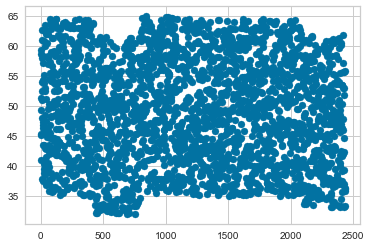

In [41]:
plt.scatter(range(len(train)),train['air_end_temp'])

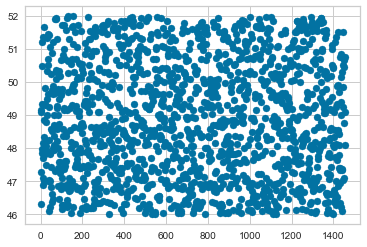

In [48]:
tar = test[(test['air_end_temp'] < 52) & (test['air_end_temp'] > 46)].reset_index(drop=True)
plt.scatter(range(len(tar)),tar['air_end_temp'])

train = pd.concat([train,tar],axis=0).reset_index(drop=True)

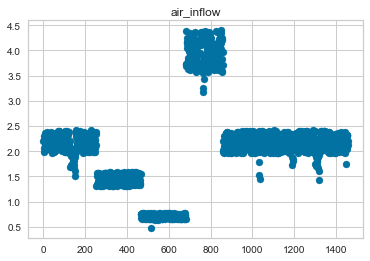

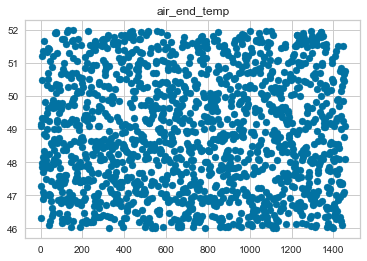

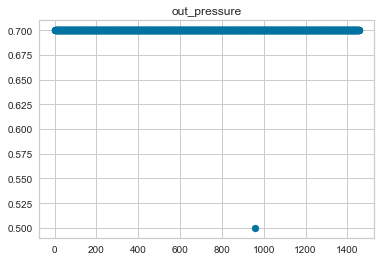

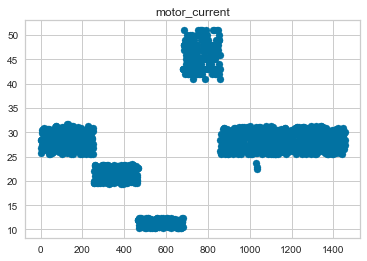

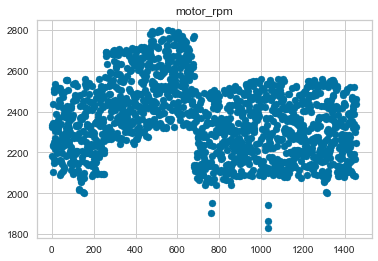

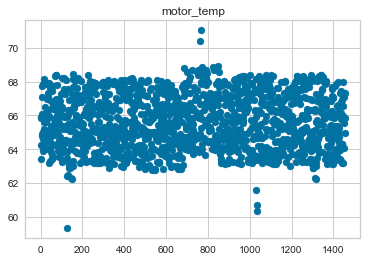

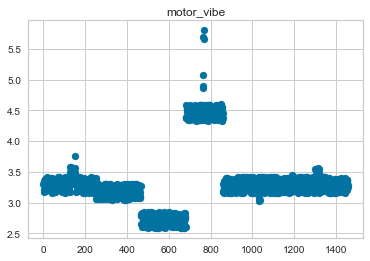

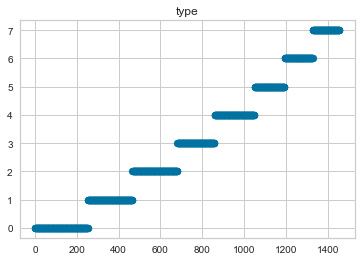

In [51]:
for i in tar.columns:
    plt.title(i)
    plt.scatter(range(len(tar)),tar[i])
    plt.show()

In [49]:
from pycaret import regression
regression.setup(data=train,target='air_end_temp',
                 remove_outliers=True)
best = regression.compare_models(sort='MSE',n_select=4,fold=5)

,Description,Value
0,Session id,2317
1,Target,air_end_temp
2,Target type,Regression
3,Original data shape,"(3893, 8)"
4,Transformed data shape,"(3758, 8)"
5,Transformed train set shape,"(2590, 8)"
6,Transformed test set shape,"(1168, 8)"
7,Numeric features,7
8,Rows with missing values,62.6%
9,Preprocess,True
